170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Train Labels Shape: (50000, 1)
Test Labels Shape: (10000, 1)

Training Set Class Distribution:
Class 0: 5000 images
Class 1: 5000 images
Class 2: 5000 images
Class 3: 5000 images
Class 4: 5000 images
Class 5: 5000 images
Class 6: 5000 images
Class 7: 5000 images
Class 8: 5000 images
Class 9: 5000 images


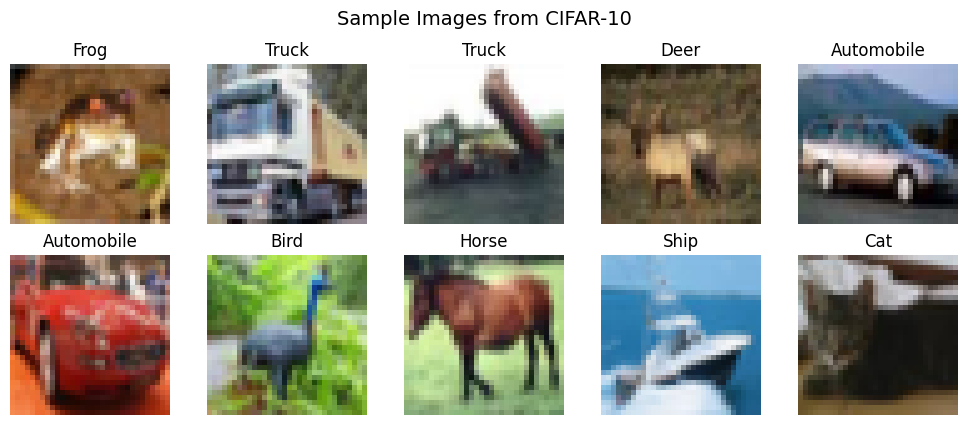

In [ ]:
import numpy as np
import matplotlib.pyplot as plt    # here prepare data for this mode, download from keras library
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = cifar10.load_data()

print(f"Train Data Shape: {cifar_train_images.shape}")
print(f"Test Data Shape: {cifar_test_images.shape}")
print(f"Train Labels Shape: {cifar_train_labels.shape}")
print(f"Test Labels Shape: {cifar_test_labels.shape}")

cifar_train_images = cifar_train_images.astype('float32') / 255.0
cifar_test_images = cifar_test_images.astype('float32') / 255.0

cifar_train_labels_encoded = to_categorical(cifar_train_labels, 10)
cifar_test_labels_encoded = to_categorical(cifar_test_labels, 10)


label_values, label_counts = np.unique(cifar_train_labels, return_counts=True)
print("\nTraining Set Class Distribution:")
for label, count in zip(label_values, label_counts):
    print(f"Class {label}: {count} images")

label_names_map = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 4))
for idx in range(10):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(cifar_train_images[idx])
    plt.title(label_names_map[cifar_train_labels[idx][0]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Images from CIFAR-10", fontsize=14, y=1.05)
plt.show()


In [ ]:
from tensorflow.keras import models, layers
def build_cifar10_classifier_model(): # constructing the cnn model
    cnn_builder = models.Sequential()

    cnn_builder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    cnn_builder.add(layers.BatchNormalization())
    cnn_builder.add(layers.MaxPooling2D((2, 2)))

    cnn_builder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnn_builder.add(layers.BatchNormalization()) 
    cnn_builder.add(layers.MaxPooling2D((2, 2)))

    cnn_builder.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    cnn_builder.add(layers.BatchNormalization())
    cnn_builder.add(layers.MaxPooling2D((2, 2)))

    cnn_builder.add(layers.Flatten())
    cnn_builder.add(layers.Dense(128, activation='relu'))
    cnn_builder.add(layers.Dropout(0.4)) 
    cnn_builder.add(layers.Dense(10, activation='softmax')) 

    return cnn_builder

cifar10_cnn_model = build_cifar10_classifier_model() # Instantiate the model

cifar10_cnn_model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


cifar10_cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']    #compile the model here
)

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

checkpoint_saver = ModelCheckpoint(
    filepath='best_cifar10_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

#  Model is trained
training_history = cifar10_cnn_model.fit(
    x=cifar_train_images,
    y=cifar_train_labels_encoded,
    epochs=10,
    batch_size=64,
    validation_data=(cifar_test_images, cifar_test_labels_encoded),
    callbacks=[early_stopper, checkpoint_saver]
)



Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8864 - loss: 0.3207
Epoch 1: val_accuracy improved from -inf to 0.69490, saving model to best_cifar10_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8864 - loss: 0.3207 - val_accuracy: 0.6949 - val_loss: 1.0673
Epoch 2/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8968 - loss: 0.2889
Epoch 2: val_accuracy improved from 0.69490 to 0.73640, saving model to best_cifar10_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8968 - loss: 0.2889 - val_accuracy: 0.7364 - val_loss: 1.0074
Epoch 3/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9024 - loss: 0.2755
Epoch 3: val_accuracy improved from 0.73640 to 0.75000, saving model to best_cifar10_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9024 - loss: 0.2756 - val_accuracy: 0.7500 - val_loss: 0.9325
Epoch 4/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9076 - loss: 0.2623
Epoch 4: val_accuracy improved from 0.75000 to 0.77510, saving model to best_cifar10_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9076 - loss: 0.2624 - val_accuracy: 0.7751 - val_loss: 0.8442
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9158 - loss: 0.2393
Epoch 5: val_accuracy did not improve from 0.77510
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9158 - loss: 0.2393 - val_accuracy: 0.7555 - val_loss: 0.9977
Epoch 6/10
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9170 - loss: 0.2413
Epoch 6: val_accuracy did not improve from 0.77510
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9169 - loss: 0.2415 - val_accuracy: 0.7529 - val_loss: 0.9767
Epoch 7/10
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9221 - loss: 0.2176
Epoch 7: val_accuracy did not improve from 0.77510
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9220 - loss: 0.2178 - val_accuracy: 0.7585 - val_loss: 1.0364
Epoch 8/10
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9234 - loss: 0.2177
Epoch 8: val_accuracy did not impro

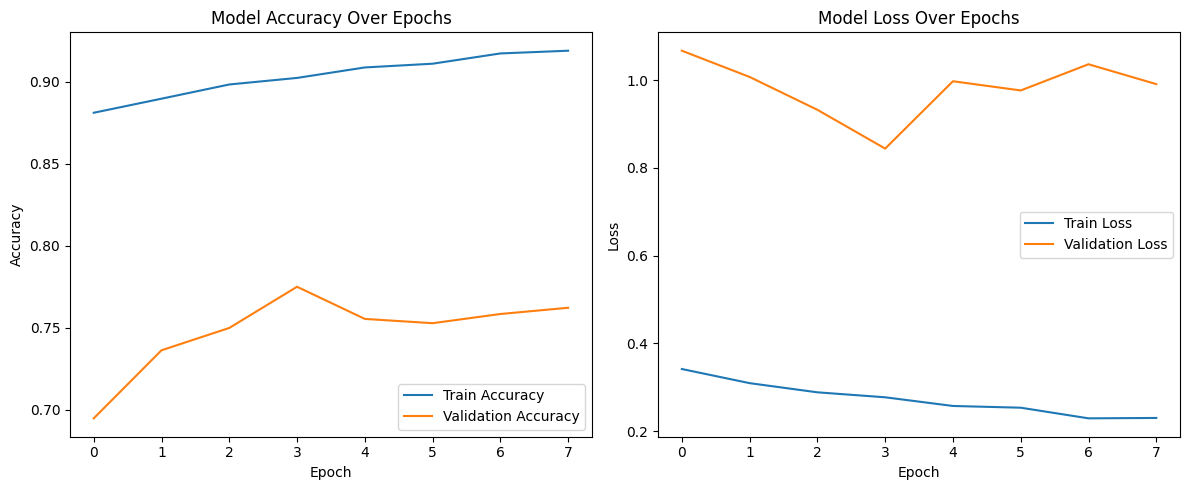

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')   #  Plot Training & Validation Accuracy/Loss
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Load best saved model weight bcuz it done want to retrain the model
cifar10_cnn_model.load_weights('best_cifar10_model.h5')



In [ ]:
test_loss_value, test_accuracy_value = cifar10_cnn_model.evaluate(
    cifar_test_images, cifar_test_labels_encoded, verbose=2
)                                                             # for evaluation

print(f"\n🔍 Test Accuracy: {test_accuracy_value:.4f}")
print(f"🧮 Test Loss: {test_loss_value:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.7751 - loss: 0.8442

🔍 Test Accuracy: 0.7751
🧮 Test Loss: 0.8442


In [ ]:
# Predict probabilities and convert to class labels for classification report
test_pred_probabilities = cifar10_cnn_model.predict(cifar_test_images)
predicted_classes = np.argmax(test_pred_probabilities, axis=1)
true_classes = np.argmax(cifar_test_labels_encoded, axis=1)

cifar10_label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                       'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print("\n📋 Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=cifar10_label_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

📋 Classification Report:
              precision    recall  f1-score   support

    Airplane       0.79      0.82      0.80      1000
  Automobile       0.86      0.89      0.88      1000
        Bird       0.64      0.73      0.69      1000
         Cat       0.60      0.60      0.60      1000
        Deer       0.80      0.69      0.74      1000
         Dog       0.77      0.60      0.67      1000
        Frog       0.83      0.83      0.83      1000
       Horse       0.77      0.84      0.80      1000
        Ship       0.90      0.86      0.88      1000
       Truck       0.81      0.88      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



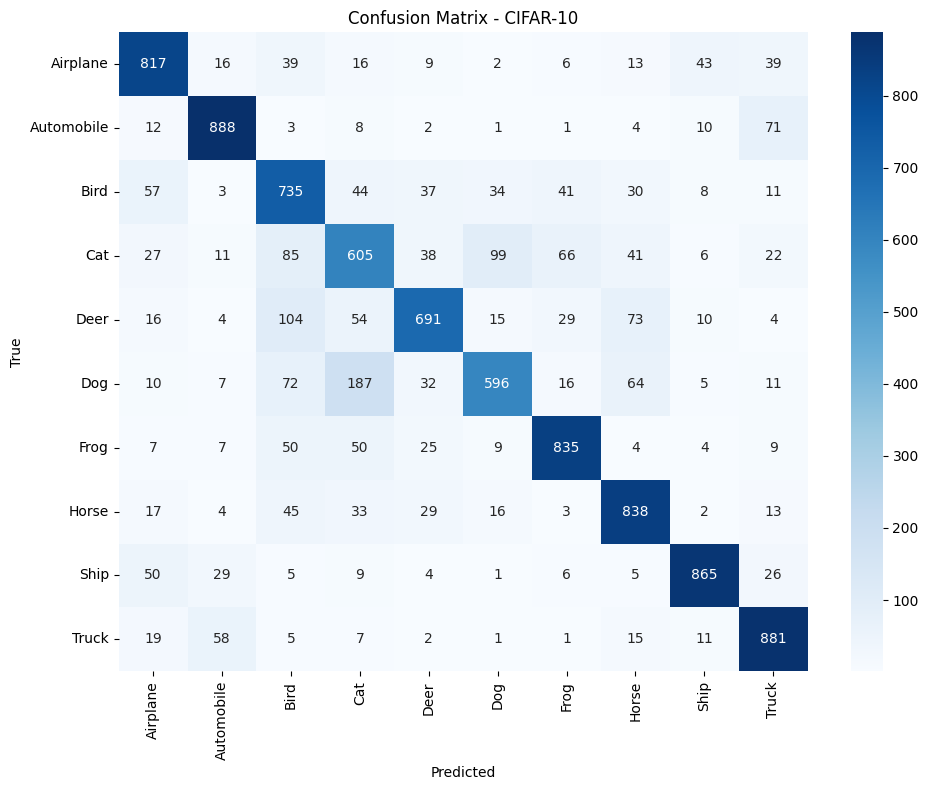

In [ ]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cifar10_label_names,
            yticklabels=cifar10_label_names)
plt.title('Confusion Matrix - CIFAR-10')   #generate confusion metrix for exact class accuracy
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

model = build_cifar10_classifier_model()
model.load_weights("best_cifar10_model.h5")
model.save("cifar10_final_model.h5")  # file to transfer
